In [8]:
import torch
import torchani
from rdkit import Chem
from rdkit.Chem import AllChem


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = torchani.models.ANI2x(periodic_table_index=True).to(device)

In [17]:

class TorchANIEnergy:
    def __init__(self, model, smiles, batch_size=1):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = model
        self.rdk_mol = Chem.MolFromSmiles(smiles)
        self.rdk_mol = Chem.AddHs(rdk_mol)
        AllChem.EmbedMolecule(rdk_mol)
        self.atomic_numbers = torch.tensor([atom.GetAtomicNum() for atom in self.rdk_mol.GetAtoms()]).to(device)
        self.data_ndim = 3 * len(self.atomic_numbers)
        self.batch_size = batch_size
        self.an_bs = self.atomic_numbers.unsqueeze(0).repeat(self.batch_size, 1)
                
    def get_energy(self, xyz):
        energies = self.model((self.an_bs, xyz)).energies
        return energies

smiles = 'CCO'
rdk_mol = Chem.MolFromSmiles(smiles)
rdk_mol = Chem.AddHs(rdk_mol)

In [18]:
energy = TorchANIEnergy(model, 'CCO', batch_size=1)

NameError: name 'get_atom_types_from_smiles' is not defined

In [11]:
energy.atomic_numbers

tensor([6, 6, 8, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [15]:
# generate random coordinates in the shape of (n_samples, n_atoms, 3)
xyz = torch.rand(1024, len(energy.atomic_numbers), 3).to(device)

In [16]:
import time
now = time.time()
energies = energy.get_energy(xyz)
print('Time:', time.time() - now)
print('Energies:', energies)

Time: 0.028456449508666992
Energies: tensor([-206.8431, -205.3601, -196.7456,  ..., -201.6755, -184.8934,
        -201.6019], device='cuda:0', dtype=torch.float64,
       grad_fn=<AddBackward0>)


In [2]:
!pip install ogb

  Using cached ogb-1.3.6-py3-none-any.whl.metadata (6.2 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Preparing metadata (setup.py) ... done
Using cached ogb-1.3.6-py3-none-any.whl (78 kB)
Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=cc2ebed8331ed3aec5de718924d429404a6d2ac57785b36222a247afc7b00ec4
  Stored in directory: /home/radoslavralev/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [1]:
from ogb.utils import smiles2graph
graph = smiles2graph('O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5')
graph

{'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  3,  6,  6,  7,  7,  8,
          8,  9,  9, 10, 10, 11,  9, 12, 12, 13, 13, 14, 14, 15, 15, 16,
         15, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22,  4,  0,  7,  5,
         13,  6, 18, 12, 21, 17,  1, 23,  2, 24,  3, 25,  4, 26,  8, 27,
         11, 28, 11, 29, 11, 30, 19, 31, 19, 32, 20, 33, 20, 34],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  3,  7,  6,  8,  7,
          9,  8, 10,  9, 11, 10, 12,  9, 13, 12, 14, 13, 15, 14, 16, 15,
         17, 15, 18, 17, 19, 18, 20, 19, 21, 20, 22, 21,  0,  4,  5,  7,
          6, 13, 12, 18, 17, 21, 23,  1, 24,  2, 25,  3, 26,  4, 27,  8,
         28, 11, 29, 11, 30, 11, 31, 19, 32, 19, 33, 20, 34, 20]]),
 'edge_feat': array([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [3, 0, 1],
        

In [12]:
graph['num_nodes']

23

In [13]:
# create a (512, 23, 3) random tensor
pos = torch.rand(512, 23, 3).to(device)

In [14]:
graph['pos'] = pos

In [17]:
from models import MACEModel

ModuleNotFoundError: No module named 'models'

In [3]:
smiles_ = ['C1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O', 'CS(=O)(=O)C', 'CC(=O)NC', 'c1ccc(cc1)C(=O)N', 'C1COCCN1']

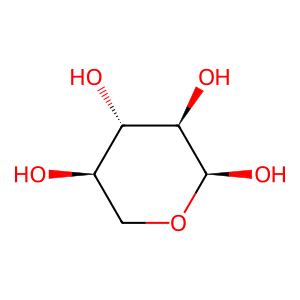

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles(smiles_[0])
img = Draw.MolToImage(mol)
img

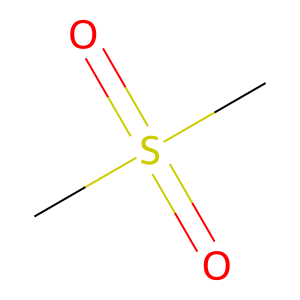

In [6]:
mol = Chem.MolFromSmiles(smiles_[1])
img = Draw.MolToImage(mol)
img

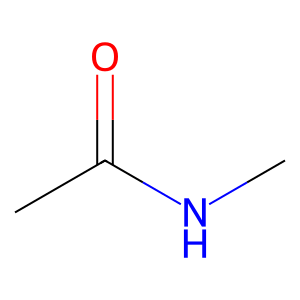

In [7]:
mol = Chem.MolFromSmiles(smiles_[2])
img = Draw.MolToImage(mol)
img

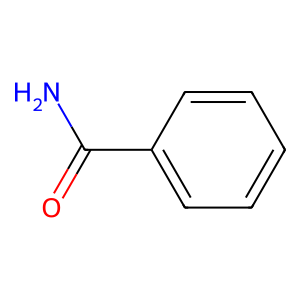

In [8]:
mol = Chem.MolFromSmiles(smiles_[3])
img = Draw.MolToImage(mol)
img

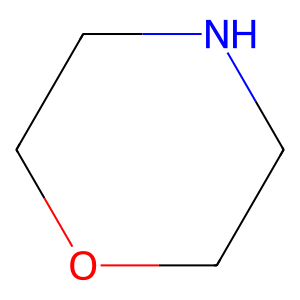

In [9]:
mol = Chem.MolFromSmiles(smiles_[4])
img = Draw.MolToImage(mol)
img

In [2]:
from tblite.interface import Calculator
import numpy as np
numbers = np.array([1, 1, 6, 5, 1, 15, 8, 17, 13, 15, 5, 1, 9, 15, 1, 15])
positions = np.array([  # Coordinates in Bohr
    [+2.79274810283778, +3.82998228828316, -2.79287054959216],
    [-1.43447454186833, +0.43418729987882, +5.53854345129809],
    [-3.26268343665218, -2.50644032426151, -1.56631149351046],
    [+2.14548759959147, -0.88798018953965, -2.24592534506187],
    [-4.30233097423181, -3.93631518670031, -0.48930754109119],
    [+0.06107643564880, -3.82467931731366, -2.22333344469482],
    [+0.41168550401858, +0.58105573172764, +5.56854609916143],
    [+4.41363836635653, +3.92515871809283, +2.57961724984000],
    [+1.33707758998700, +1.40194471661647, +1.97530004949523],
    [+3.08342709834868, +1.72520024666801, -4.42666116106828],
    [-3.02346932078505, +0.04438199934191, -0.27636197425010],
    [+1.11508390868455, -0.97617412809198, +6.25462847718180],
    [+0.61938955433011, +2.17903547389232, -6.21279842416963],
    [-2.67491681346835, +3.00175899761859, +1.05038813614845],
    [-4.13181080289514, -2.34226739863660, -3.44356159392859],
    [+2.85007173009739, -2.64884892757600, +0.71010806424206],
])
calc = Calculator("GFN2-xTB", numbers, positions)
res = calc.singlepoint()
res.get("energy"), res.get("gradient")

------------------------------------------------------------
  cycle        total energy    energy error   density error
------------------------------------------------------------
      1     -31.30086746450  -3.1478794E+01   3.3527171E-01
      2     -31.42591394352  -1.2504648E-01   2.5461057E-01
      3     -31.38390717766   4.2006766E-02   2.0097000E-01
      4     -31.65430714370  -2.7039997E-01   1.0795467E-01
      5     -31.70760519808  -5.3298054E-02   6.5352946E-02
      6     -31.69491239413   1.2692804E-02   4.8412026E-02
      7     -31.70847149422  -1.3559100E-02   4.2919999E-02
      8     -31.71179791884  -3.3264246E-03   2.7709746E-02
      9     -31.71584307249  -4.0451537E-03   8.0391049E-03
     10     -31.71608246713  -2.3939464E-04   3.8893373E-03
     11     -31.71614905343  -6.6586301E-05   1.5702043E-03
     12     -31.71615588054  -6.8271154E-06   8.7835837E-04
     13     -31.71615718646  -1.3059193E-06   5.4461612E-04
     14     -31.71615864453  -1.458062

(array(-31.71615889),
 array([[ 6.12908576e-03,  2.90611854e-03,  4.74433366e-03],
        [-8.62513569e-03, -2.99289947e-03, -4.08654579e-03],
        [ 1.33796065e-03, -3.27779686e-03,  1.31842986e-03],
        [ 5.44082743e-03,  8.28159859e-03, -1.31811113e-03],
        [-1.76198704e-03,  7.62859884e-04,  2.62652366e-03],
        [-7.99339083e-03,  2.53135407e-04, -2.85739142e-03],
        [ 8.37656754e-03,  1.32500065e-02,  2.87346775e-04],
        [ 1.59777502e-02,  1.55274316e-02,  2.68724585e-03],
        [-1.51236173e-02, -2.48544687e-02, -3.51834908e-03],
        [-2.36807646e-02, -1.37456763e-04, -3.56292812e-03],
        [ 1.88409941e-03, -2.17746872e-02, -9.49628855e-03],
        [ 8.12535957e-05, -6.54225238e-03, -1.92542143e-03],
        [ 1.13008097e-02, -1.70083190e-03, -1.51238963e-03],
        [ 2.40901080e-03,  1.78628135e-02,  7.54747344e-03],
        [-1.44412083e-03,  2.84171300e-03, -2.21920388e-03],
        [ 5.69165121e-03, -4.05283670e-04,  1.12852758e-02]]))

In [ ]:
# write a pytorch module with the same interface, implement the backward method as well using the gradient
# from the calculator
class GFN2xTB(torch.nn.Module):
    def __init__(self, numbers, positions):
        super(GFN2xTB, self).__init__()
        self.numbers = numbers
        self.positions = positions
        self.calc = Calculator("GFN2-xTB", numbers, positions)
        
    def forward(self):
        res = self.calc.singlepoint()
        return res.get("energy")
    
    def backward(self):
        res = self.calc.singlepoint()
        return res.get("gradient")

In [1]:
from jax import grad
import jax.numpy as jnp


In [2]:
jnp.load('../weights/jax_vac.pkl', allow_pickle=True)

FrozenDict({
    params: {
        BesselEmbedding_0: {
            frequencies: Array([ 2.9903498,  6.5449657,  6.377699 , 10.028718 , 16.563284 ,
                   16.812515 , 19.504303 , 20.401846 ], dtype=float32),
        },
        Linear_0: {
            w[0,1] 100x0e,64x0e: Array([[ 2.6517096 ,  2.3676348 ,  3.5178254 , ..., -2.902644  ,
                     2.284686  ,  2.9373791 ],
                   [-0.9940013 ,  0.3803029 ,  1.6210414 , ..., -0.96834165,
                    -1.6334879 ,  0.39534897],
                   [ 0.4580059 ,  1.2355264 , -0.6784407 , ...,  0.71127695,
                     0.2833406 , -0.176948  ],
                   ...,
                   [ 0.85014063,  0.39599714,  1.3577545 , ..., -1.0774416 ,
                    -0.99148256,  1.1849382 ],
                   [-0.07677869,  1.3047605 , -0.40053305, ..., -0.1612327 ,
                     1.1038661 ,  1.3799711 ],
                   [ 0.01365523,  0.05361365,  0.8780899 , ...,  0.4370484 ,
       

In [3]:

from ml_collections import ConfigDict

def initialize_nequip_cfg_MaxSetup(n_species, r_cut) -> ConfigDict:
    """Initialize configuration based on values of original paper."""

    config = ConfigDict()

    # Information on hyperparameters
    # 1. Cutoff is very important - For MD17 papers employ cutoff = 4 Å
    # Further potential changes:
        # 1. Increase hidden layers
        # 2. Increase number of basis functions

    # network
    config.graph_net_steps = 5  #2  #(3-5 work best -> Paper)
    config.nonlinearities = {'e': 'raw_swish', 'o': 'tanh'}
    config.use_sc = True
    config.n_elements = n_species
    config.hidden_irreps = '64x0o + 64x0e + 64x1o + 64x1e + 64x2o + 64x2e'  # l_max=2, parity=True
    config.sh_irreps = '1x0e+1x1o+1x2e'     # l_max=2, parity=True
    config.num_basis = 8
    config.r_max = r_cut
    config.radial_net_nonlinearity = 'raw_swish'
    config.radial_net_n_hidden = 64  # 8  # Smaller is faster # 64
    config.radial_net_n_layers = 3

    # Setting dependend on dataset
    # QM7x all data
    config.n_neighbors = 15
    config.shift = 0.
    config.scale = 1.
    config.scalar_mlp_std = 4.
    return config

In [ ]:
def model_from_config(cfg: ConfigDict) -> nn.Module:
  model_family = cfg.get('model_family', 'nequip')
  if model_family == 'nequip':
    return nequip.model_from_config(cfg)
  else:
    raise ValueError(f'Unrecognized model family: {model_family}')


In [33]:
import sys
import os
import torch
import torch.nn.functional as F

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from models.ImplicitSGNN.GNN_Trainer import Trainer

pt_file = '../weights/test_set.pt' # Needs to be downloaded from ETH Research Collection
gnn_file = '../weights/GNN_state_dict.pt'

def calculate_force_loss_only(pre_energy, pre_forces, ldata):
    loss = F.mse_loss(pre_forces, ldata.forces)
    return loss


trainer = Trainer(verbose=False,name='GNN3_pub_vis',path='trained_models',force_mode=True,enable_tmp_dir=False,random_state=3)

device = 'cuda'
trainer.explicit = True
print('load data',flush=True)
gbneck_parameters, unique_radii = trainer.prepare_training_data_from_pt_file(pt_file)
print('data loaded',flush=True)
trainer.model = GNN3_scale_64(device='cuda', unique_radii=unique_radii, parameters=gbneck_parameters)
trainer.model.load_state_dict(torch.load(gnn_file))
trainer.set_lossfunction(calculate_force_loss_only)
# loss = trainer.test_model()
# pre,exp = trainer.return_test_set_predictions()

load data
data loaded


In [36]:
from ogb.utils import smiles2graph

model = trainer.model
graph = smiles2graph('O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5')
pos = torch.rand(512, 23, 3).to(device)
graph['pos'] = pos
model(graph)

AttributeError: 'dict' object has no attribute 'pos'

In [3]:
import torch
import torchani
import os
import math
import torch.utils.tensorboard
import tqdm
import pickle

# helper function to convert energy unit from Hartree to kcal/mol
from torchani.units import hartree2kcalmol

# device to run the training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [4]:
Rcr = 5.2000e+00
Rca = 3.5000e+00
EtaR = torch.tensor([1.6000000e+01], device=device)
ShfR = torch.tensor([9.0000000e-01, 1.1687500e+00, 1.4375000e+00, 1.7062500e+00, 1.9750000e+00, 2.2437500e+00, 2.5125000e+00, 2.7812500e+00, 3.0500000e+00, 3.3187500e+00, 3.5875000e+00, 3.8562500e+00, 4.1250000e+00, 4.3937500e+00, 4.6625000e+00, 4.9312500e+00], device=device)
Zeta = torch.tensor([3.2000000e+01], device=device)
ShfZ = torch.tensor([1.9634954e-01, 5.8904862e-01, 9.8174770e-01, 1.3744468e+00, 1.7671459e+00, 2.1598449e+00, 2.5525440e+00, 2.9452431e+00], device=device)
EtaA = torch.tensor([8.0000000e+00], device=device)
ShfA = torch.tensor([9.0000000e-01, 1.5500000e+00, 2.2000000e+00, 2.8500000e+00], device=device)
species_order = ['H', 'C', 'N', 'O']
num_species = len(species_order)
aev_computer = torchani.AEVComputer(Rcr, Rca, EtaR, ShfR, EtaA, Zeta, ShfA, ShfZ, num_species)
energy_shifter = torchani.utils.EnergyShifter(None)


In [5]:
try:
    path = os.path.dirname(os.path.realpath(__file__))
except NameError:
    path = os.getcwd()
dspath = os.path.join(path, '../dataset/ani1-up_to_gdb4/ani_gdb_s01.h5')
batch_size = 2560

pickled_dataset_path = 'dataset.pkl'

# We pickle the dataset after loading to ensure we use the same validation set
# each time we restart training, otherwise we risk mixing the validation and
# training sets on each restart.
if os.path.isfile(pickled_dataset_path):
    print(f'Unpickling preprocessed dataset found in {pickled_dataset_path}')
    with open(pickled_dataset_path, 'rb') as f:
        dataset = pickle.load(f)
    training = dataset['training'].collate(batch_size).cache()
    validation = dataset['validation'].collate(batch_size).cache()
    energy_shifter.self_energies = dataset['self_energies'].to(device)
else:
    print(f'Processing dataset in {dspath}')
    training, validation = torchani.data.load(dspath)\
                                        .subtract_self_energies(energy_shifter, species_order)\
                                        .species_to_indices(species_order)\
                                        .shuffle()\
                                        .split(0.8, None)
    with open(pickled_dataset_path, 'wb') as f:
        pickle.dump({'training': training,
                     'validation': validation,
                     'self_energies': energy_shifter.self_energies.cpu()}, f)
    training = training.collate(batch_size).cache()
    validation = validation.collate(batch_size).cache()
print('Self atomic energies: ', energy_shifter.self_energies)

Processing dataset in /home/radoslavralev/Documents/Thesis/gfn-diffusion/energy_sampling/notebooks/../dataset/ani1-up_to_gdb4/ani_gdb_s01.h5


RuntimeError: subtract_self_energies could not find any energies in the provided dataset.
Please make sure the path provided to data.load() points to a dataset has energies and is not empty or corrupted.